In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [49]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [5]:
import seaborn as sns

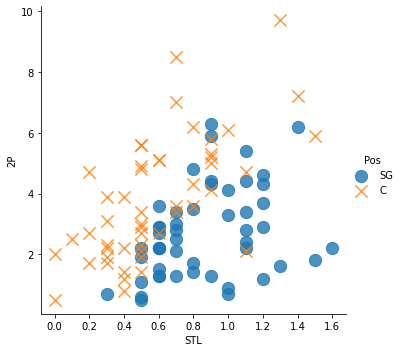

In [7]:
sns.lmplot(x='STL', y='2P', data =df, fit_reg = False, scatter_kws={"s":150}, markers =["o","x"], hue='Pos')

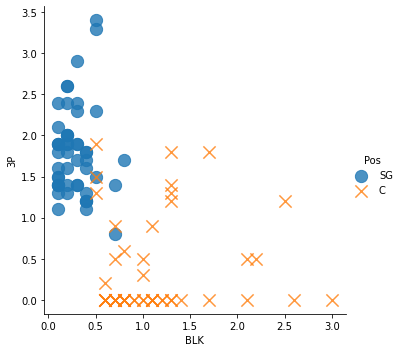

In [8]:
sns.lmplot(x='BLK', y='3P', data =df, fit_reg = False, scatter_kws={"s":150}, markers =["o","x"], hue='Pos')

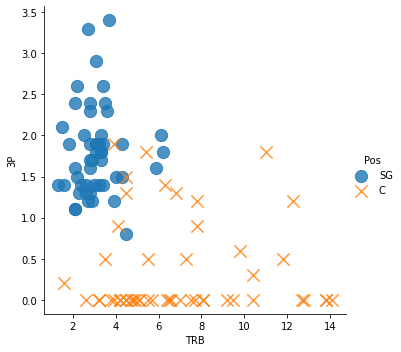

In [10]:
sns.lmplot(x='TRB', y='3P', data =df, fit_reg = False, scatter_kws={"s":150}, markers =["o","x"], hue='Pos')

In [11]:
df.drop(['2P','AST','STL'], axis=1, inplace=True)

In [15]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [18]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df, test_size=0.2)

In [19]:
train

,Player,Pos,3P,TRB,BLK
4,Will Barton,SG,1.5,4.3,0.5
89,Klay Thompson,SG,3.4,3.7,0.5
5,Nicolas Batum,SG,1.8,6.2,0.4
42,Joe Harris,SG,1.6,2.8,0.2
8,Patrick Beverley,SG,1.6,5.9,0.4
...,...,...,...,...,...
18,DeMarcus Cousins,C,1.8,11.0,1.3
90,Tristan Thompson,C,0.0,9.2,1.1
71,Timofey Mozgov,C,0.0,4.9,0.6
3,Chris Andersen,C,0.0,2.6,0.6


In [ ]:
#예측도가 가장 높은 최적의 k값 찾기 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [22]:
max_k_range = train.shape[0]//2

In [29]:
k_list = []
for i in range(3, max_k_range,2):
  k_list.append(i)
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
  cross_validation_scores.append(scores.mean())


In [30]:
import matplotlib.pyplot as plt

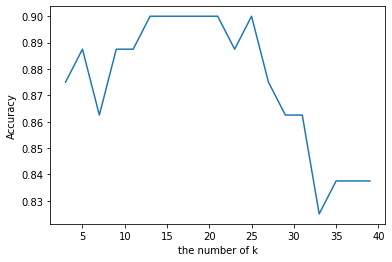

The best number of K : 13


In [33]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of K : "+ str(k))

In [34]:
from sklearn.metrics import accuracy_score

In [43]:
import numpy as np

In [38]:
knn = KNeighborsClassifier(n_neighbors = k)
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=13)

In [45]:
x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]
pred = knn.predict(x_test)

In [47]:
print(f"accuracy:{accuracy_score(y_test.values.ravel(),pred)}")

accuracy:0.95


In [48]:
comparison = pd.DataFrame({'predticion':pred,'ground_truth':y_test.values.ravel()})
comparison

,predticion,ground_truth
0,SG,SG
1,C,C
2,C,C
3,C,C
4,C,C
5,C,SG
6,C,C
7,SG,SG
8,C,C
9,SG,SG


In [56]:
from google.colab import files
files.upload()

Saving LinearRegression.csv to LinearRegression (1).csv


{'LinearRegression.csv': b''}

In [64]:
df= pd.read_csv('LinearRegression.csv')

EmptyDataError: ignored

In [ ]:
df['height'] = df['height']/10
df

In [ ]:
df.shape

In [ ]:
x = df['height']
y = df['weight']

In [54]:
from  sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
lr = LinearRegression()
lr.fit(x.values.reshape(-1,1), y)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,lr.predict(x.values.reshape(-1,1)))
plt.show

In [58]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [ ]:
model = Sequential()

In [65]:
from sklearn.datasets import load_breast_cancer

In [67]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)

In [68]:
df.iloc[:,:10]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [71]:
df["label"] = breast_cancer.target

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [77]:
feature = ["mean texture", "mean smoothness", "mean symmetry", "mean fractal dimension", "mean area", "mean concave points"]
target = "label"


In [80]:
x_train = train[["mean texture", "mean smoothness", "mean symmetry", "mean fractal dimension", "mean area", "mean concave points"]]
y_train = train[target]

In [81]:
x_test = test[feature]
y_test = test[target]

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [84]:
print(f'정확도: {log.score(x_test,y_test)}')

정확도: 0.868421052631579
